In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from cleaning_pipeline import goods, full_prod_orders

# Use to reimport module if you make change to the .py
# importlib.reload(cleaning_pipeline)

### Cluster based on aggregate stats from Jordan
- K-Means with k = 3 based on elbow plot
- PCA of full and reduced datasets

In [91]:
user_summary = pd.read_csv('../data/user_summary.csv')
user_summary.sample(10)

,user_id,total_orders,total_products,min_products,max_products,med_products,avg_products,std_products,max_reordered,med_reordered,avg_reordered,std_reordered,mode_day_of_week,mode_hour_of_day,total_days,min_days,max_days,med_days,avg_days,std_days
29018,29019,14,186,2,24,13.5,13.285714,6.144774,1.000000,0.631222,0.561438,0.291456,0,13,169,8.0,30.0,28.0,22.934911,7.533372
8600,8601,64,834,2,27,12.0,13.031250,5.474236,1.000000,0.773504,0.693926,0.249745,1,10,813,0.0,29.0,4.0,5.885609,5.232567
64722,64723,5,45,3,25,4.0,9.000000,9.407444,0.333333,0.080000,0.122667,0.143419,0,18,41,6.0,30.0,14.0,17.243902,7.621616
112877,112878,4,9,1,3,2.5,2.250000,0.957427,1.000000,0.500000,0.500000,0.430331,[2 6],[15 21],7,10.0,30.0,26.0,20.857143,10.253919
205515,205516,19,176,1,22,8.0,9.263158,6.117753,1.000000,0.357143,0.415479,0.343098,0,19,165,0.0,30.0,4.0,8.587879,8.032698
125650,125651,6,23,1,6,4.0,3.833333,1.722401,1.000000,0.775000,0.619444,0.430815,4,16,19,6.0,30.0,22.0,17.684211,9.849155
14985,14986,25,239,2,25,8.0,9.560000,5.439669,1.000000,0.636364,0.636136,0.344559,5,[ 6 11 14],218,4.0,30.0,7.0,9.711009,6.587516
126170,126171,22,151,1,14,7.0,6.863636,3.468161,1.000000,0.477273,0.483096,0.342036,0,20,147,1.0,30.0,6.0,9.755102,7.187882
116240,116241,36,427,2,31,11.0,11.861111,7.514378,1.000000,1.000000,0.817186,0.245636,0,17,400,1.0,23.0,8.0,10.365000,6.642823
93208,93209,6,216,23,51,36.0,36.000000,11.313708,0.875000,0.633540,0.576657,0.313547,3,12,165,3.0,27.0,14.0,13.945455,9.019122


In [18]:
user_summary = user_summary.drop(['mode_day_of_week', 'mode_hour_of_day'],axis=1)

In [25]:
from __future__ import print_function
from sklearn.cluster import KMeans

from PlottingFunctions import plot_inertia, plot_silhouette

kmeans = KMeans()
kmeans.set_params(n_clusters=3)
kmeans.fit(user_summary)


# plot_inertia(kmeans, user_summary.iloc[:,0:2].values, range(1, 10))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

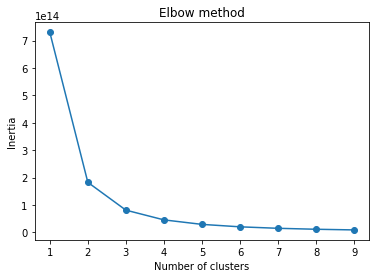

In [23]:
# Use K = 3
plot_inertia(kmeans, user_summary, range(1, 10))

In [28]:
# K-means evenly split the groups. Seems suspicious
pd.Series(kmeans.labels_)

1    68857
2    68737
0    68615
dtype: int64

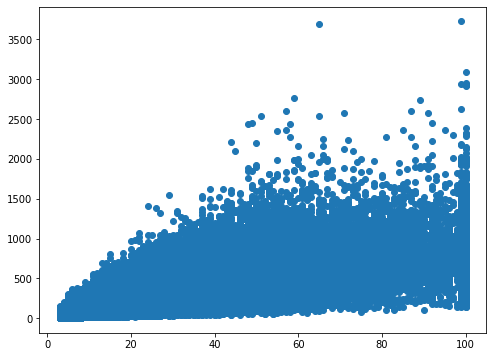

In [90]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(user_summary.total_orders, user_summary.total_products)
plt.show()

In [77]:
pca_users = user_summary.drop('user_id', axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pca_users)
users_scaled = scaler.transform(pca_users)


In [86]:
pc_list = range(1, len(pca_users.columns.tolist())+1)
pc_number = ['PC'+str(i) for i in pc_list]

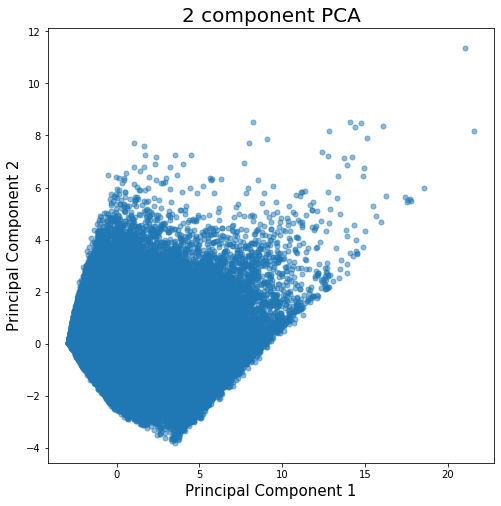

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(users_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_number)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC1']],
           principalDf[['PC2']],
            s = 25, alpha=0.5)


In [88]:
pca.explained_variance_ratio_

array([3.35896650e-01, 2.38474891e-01, 1.20463163e-01, 9.62285285e-02,
       7.81324471e-02, 5.09846463e-02, 2.76148521e-02, 2.00146404e-02,
       9.95736706e-03, 7.47169529e-03, 5.59076239e-03, 4.01561586e-03,
       1.85522603e-03, 1.71216164e-03, 1.20478234e-03, 3.66078414e-04,
       1.64917395e-05])

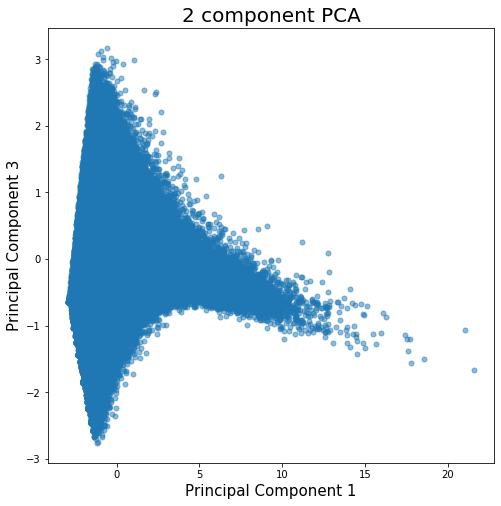

In [101]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC1']],
           principalDf[['PC3']],
            s = 25, alpha=0.5)

[9.97750908e-01 1.46875328e-03 4.00957707e-04 2.99282298e-04
 7.97782397e-05 3.20925826e-07]


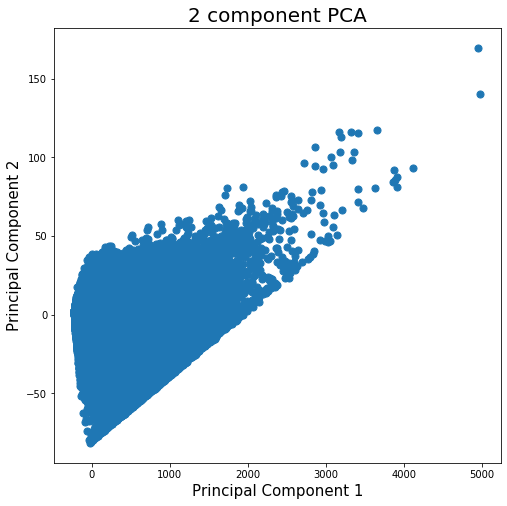

In [89]:
# Make reduced PCA using fewer stats
new_list = user_summary.columns.tolist()[:-1]
indices = [1,2,6,10,12,-1]
subset_list = [new_list[i] for i in indices]
reduced_users = user_summary[subset_list]

pc_list = range(1, len(reduced_users.columns.tolist())+1)
pc_number = ['PC'+str(i) for i in pc_list]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(reduced_users)
users_scaled = scaler.transform(reduced_users)


from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(reduced_users)
principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_number)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC1']],
           principalDf[['PC2']],
            s = 50)
print(pca.explained_variance_ratio_)

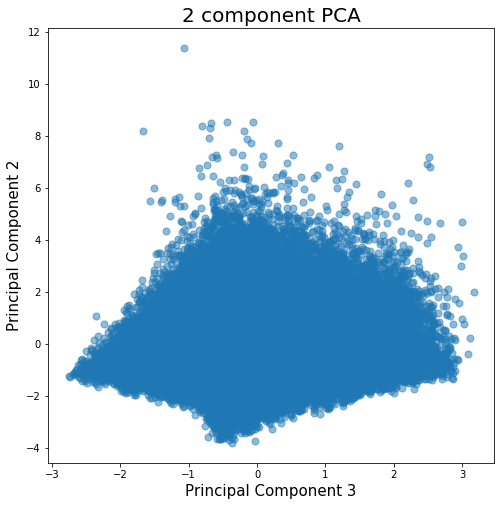

In [100]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC3']],
           principalDf[['PC2']],
            s = 50, alpha=0.5)

In [29]:
num_items_per_aisle_user = full_prod_orders.groupby(['user_id', 'aisle'], as_index=False).product_id.agg('count')

In [30]:
### BUG IN HERE, FIX THISS!!!
total_items_per_user= full_prod_orders.groupby('user_id', as_index=False).product_id.agg('count')

In [31]:
percent_aisle_df = pd.merge(num_items_per_aisle_user, total_items_per_user, on = ['user_id', 'user_id'] )
percent_aisle_df['percent_aisle'] = percent_aisle.product_id_x/percent_aisle.product_id_y*100

In [40]:
full_prod_orders[full_prod_orders.user_id==1][full_prod_orders.aisle_id==24]

C:\Users\Zefa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
708089,431534,13176,8,1,1,5,4,15,28.0,bag_of_organic_bananas,24,4,produce,fresh_fruits
926243,2398795,13176,4,0,1,2,3,7,15.0,bag_of_organic_bananas,24,4,produce,fresh_fruits
14794951,431534,41787,7,0,1,5,4,15,28.0,bartlett_pears,24,4,produce,fresh_fruits
14934278,431534,17122,6,0,1,5,4,15,28.0,honeycrisp_apples,24,4,produce,fresh_fruits
17033304,431534,10326,5,0,1,5,4,15,28.0,organic_fuji_apples,24,4,produce,fresh_fruits


In [ ]:
full_prod_orders.groupby(['user_id','aisle']).agg('count')

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Percent Aisle', fontsize = 15)
ax.set_ylabel('Aisle', fontsize = 15)
ax.set_title('Percent by Aisle', fontsize = 20)
ax.scatter(percent_aisle[['percent_aisle']],
           percent_aisle[['aisle_id']],
            s = 50)

Error in callback <function flush_figures at 0x00000168D55AD318> (for post_execute):


KeyboardInterrupt: 

In [6]:
num_items_per_dept_user = full_prod_orders.groupby(['user_id', 'department'], as_index=False).product_id.agg('count')

In [10]:
total_items_per_user= full_prod_orders.groupby('user_id', as_index=False).product_id.agg('count')

In [26]:
percent_aisle_df = pd.merge(num_items_per_aisle_user, total_items_per_user, on = ['user_id', 'user_id'] )
percent_aisle_df['percent_aisle'] = percent_aisle.product_id_x/percent_aisle.product_id_y*100

In [28]:
full_prod_orders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,3,5,9,8.0,organic_egg_whites,86,16,dairy_eggs,eggs
1,26,33120,5,0,153404,2,0,16,7.0,organic_egg_whites,86,16,dairy_eggs,eggs
2,120,33120,13,0,23750,11,6,8,10.0,organic_egg_whites,86,16,dairy_eggs,eggs
3,327,33120,5,1,58707,21,6,9,8.0,organic_egg_whites,86,16,dairy_eggs,eggs
4,390,33120,28,1,166654,48,0,12,9.0,organic_egg_whites,86,16,dairy_eggs,eggs


### To Do:
   - Build DF for % items bought per department for each user
   - Run Correlation of departments against each other to check for relationships
   - Run Elbow plot and K-means
   - Repeat for Aisle